# WeRateDogs Twitter Analysis

## Importing Packages

In [47]:
import pandas as pd
import os
import requests
#import tweepy
#from tweepy import OAuthHandler
#from timeit import default_timer as timer
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering

### Reading the enhanced twitter data 

In [2]:
#Reading the twitter archived data into a dataframe
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Using Requests library to download tweet image prediction data

In [3]:
#Getting the image prediction data using requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(r.content)

In [4]:
#Reading the tsv file into dataframe
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
image_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Using Twitter API (Tweepy) to get additional data

In [17]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'OAuthHandler' is not defined

In [5]:
#Creating a dataframe from the tweet json data
tweet_list = []
with open('tweet-json.txt', 'r') as file:
    data = file.readlines()
    for line in data:
        tweet = json.loads(line)
        tweet_id  = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        tweet_list.append({'tweet_ID':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count})
tweet_data = pd.DataFrame(tweet_list, columns= ['tweet_ID', 'retweet_count', 'favorite_count'])

In [6]:
tweet_data.head(2)

,tweet_ID,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


## Assessing Data

In [7]:
#Visually assessing the archive dataframe
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
#Visually assessing the image_prediction data frame
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
#Visually assessing the additionla tweet data frame
tweet_data

,tweet_ID,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [24]:
#Checking the data shape, data types, and non null values
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
#Checking the data shape, data types, and non null values
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
#Checking the data shape, data types, and non null values
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_ID        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [12]:
#Getting the count of unique dog name
archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [13]:
#Getting the count of unique rating denominator value
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [14]:
#Identifying unique values in the source column
archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [15]:
#Checking for duplicate values using tweet_id column
archive.tweet_id.duplicated().sum()

0

In [16]:
#Checking for duplicate using the jpg_url column in image_prediction dataframe
image_prediction.jpg_url.duplicated().sum()

66

In [17]:
#Checking for duplicates in the tweet_data dataframe
tweet_data.duplicated().sum()

0

### Quality Issues

#### `archive` table
* Timestamp column is an object data type
* There are some tweets with retweeted_id
* Null values are written as 'None' in all the dog stages columns
* Some of the values in the rating denominator column are not 10
* source column contains html tags
* some columns are not needed for the analysis

#### `image_prediction` table
* Duplicate values in jpg_url column
* some images were not predicted as dog
* some columns are not needed for the analysis


### Tidiness Issues

* dog stages (doggo	floofer	pupper	puppo) in 4 different columns in `archive` table
* all the 3 dataframes should be combined as one


## Cleaning Data

In [18]:
#Making a copy of all dataframe
archive_clean = archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_data_clean = tweet_data.copy()

### There are some tweets with retweeted_id

### Define
Extract tweets data with null retweeted_id

### Code

In [19]:
#Subseting the data frame isnull method
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

### Test

In [20]:
archive_clean.retweeted_status_id.notnull().sum()

0

### Timestamp column is an object data type

### Define
Convert the timestamp column data type to datetime

### Code

In [21]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

### Test

In [22]:
archive_clean.timestamp.dtypes

datetime64[ns, UTC]

### Some of the values in the rating denominator column are not 10

### Define
Drop rows where the rating denominator is not equal to 10

### Code

In [23]:
archive_clean = archive_clean[archive_clean.rating_denominator==10]

### Test

In [24]:
archive_clean.rating_denominator.unique()

array([10], dtype=int64)

### Source column contains htmltags

### Define
Extract the tweet source from source column using the replace method

### Code

In [25]:
archive_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone', inplace = True)
archive_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client',inplace = True)
archive_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Make a Scene', inplace = True)
archive_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', inplace = True)

### Test

In [26]:
archive_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Make a Scene',
       'TweetDeck'], dtype=object)

### Dog stages in 4 different columns

### Define
Combine Dog stages into one column (dog_stage)

### Code

In [27]:
archive_clean.replace('None', '', inplace = True)
archive_clean['dog_stage'] = archive_clean.doggo+ archive_clean.floofer+archive_clean.pupper+archive_clean.puppo
archive_clean.replace('', 'None', inplace = True)
archive_clean.drop(['doggo','floofer','pupper','puppo'],axis = 1, inplace = True)

### Test

In [28]:
archive_clean.dog_stage.value_counts()

None            1809
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [29]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2153 non-null   int64              
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   timestamp                   2153 non-null   datetime64[ns, UTC]
 4   source                      2153 non-null   object             
 5   text                        2153 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      float64            
 9   expanded_urls               2099 non-null   object             
 10  rating_numerator            2153 non-null   int64           

### Some columns are not needed for analysis

### Define
Drop the columns that will not be required for the analysis

### Code

In [30]:
archive_clean.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id','text','retweeted_status_id','retweeted_status_user_id',
                       'retweeted_status_timestamp','expanded_urls'],inplace = True)

### Test

In [31]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2153 non-null   int64              
 1   timestamp           2153 non-null   datetime64[ns, UTC]
 2   source              2153 non-null   object             
 3   rating_numerator    2153 non-null   int64              
 4   rating_denominator  2153 non-null   int64              
 5   name                2153 non-null   object             
 6   dog_stage           2153 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 134.6+ KB


### jpg_url column contains duplicates

### Define
Drop duplicates found in jpg_url column

### Code

In [32]:
image_prediction_clean = image_prediction_clean.drop_duplicates(subset = 'jpg_url')

### Test

In [33]:
image_prediction_clean.jpg_url.duplicated().sum()

0

### Some images were not predicted as dog

### Define
Determine the dog type by the first prediction and drop image that was not predicted as dog

### Code

In [34]:
dog_type = []
confidence_level = []

def predict_dog(df):
    if df.p1_dog == True:
        dog_type.append(df.p1)
        confidence_level.append(df.p1_conf)
    elif df.p2_dog == True:
        dog_type.append(df.p2)
        confidence_level.append(df.p2_conf)
    elif df.p3_dog == True:
        dog_type.append(df.p3)
        confidence_level.append(df.p3_conf)
    else:
        dog_type.append(np.nan)
        confidence_level.append(np.nan)

image_prediction_clean.apply(predict_dog, axis =1)

image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_level'] = confidence_level

image_prediction_clean = image_prediction_clean.dropna()

image_prediction_clean.drop(['img_num','p1','p1_conf','p1_dog',
                             'p2','p2_conf','p2_dog',
                            'p3','p3_conf','p3_dog'], axis = 1, inplace = True)

### Test

In [35]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1691 non-null   int64  
 1   jpg_url           1691 non-null   object 
 2   dog_type          1691 non-null   object 
 3   confidence_level  1691 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 66.1+ KB


### All the 3 dataframe should be merged together

### Define
Merged the 3 dataframe (archive_clean, image_prediction_clean, tweet_data) together 

### Code

In [36]:
master_df = archive_clean.merge(image_prediction_clean, how = 'inner', on  = 'tweet_id')
master_df = master_df.merge(tweet_data_clean, how = 'inner', left_on = 'tweet_id', right_on = 'tweet_ID')
master_df.drop('tweet_ID', axis =1,inplace = True)

### Test

In [37]:
master_df.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,confidence_level,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,3261,20562


## Storing Data

In [38]:
master_df.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualization

In [39]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,confidence_level,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,3261,20562


###  1. What is the distribution of tweet source?

In [57]:
df.source.value_counts()

Twitter for iPhone    1638
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

### 2. What dog type is the most reviewed?

In [68]:
df.dog_type.value_counts()

golden_retriever      154
Labrador_retriever    105
Pembroke               95
Chihuahua              90
pug                    62
                     ... 
Scotch_terrier          1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
Irish_wolfhound         1
Name: dog_type, Length: 113, dtype: int64

Text(0.5, 1.0, 'Top 5 Most Reviewed Dog Type')

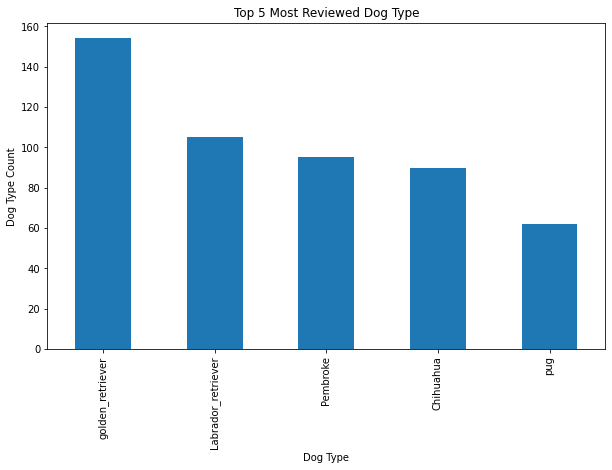

In [48]:
top_dog_type = df.dog_type.value_counts().head(5)
top_dog_type.plot(kind = 'bar', figsize=(10,6))
plt.xlabel('Dog Type')
plt.ylabel('Dog Type Count')
plt.title('Top 5 Most Reviewed Dog Type')

### 3. Which dog type has the most favorite count?

In [52]:
df.groupby('dog_type')['favorite_count'].mean().sort_values(ascending = False)

dog_type
Saluki                  24060.000000
Bedlington_terrier      21153.166667
French_bulldog          18416.806452
Bouvier_des_Flandres    18032.000000
Afghan_hound            17326.666667
                            ...     
Tibetan_terrier          1841.000000
Irish_wolfhound          1534.000000
Japanese_spaniel         1362.000000
groenendael              1156.500000
Brabancon_griffon         885.000000
Name: favorite_count, Length: 113, dtype: float64

Text(0.5, 1.0, 'Top 5 Dog Type by Favorite Count')

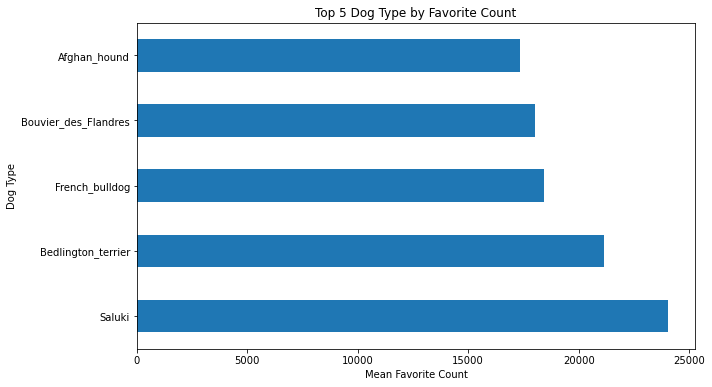

In [56]:
df.groupby('dog_type')['favorite_count'].mean().sort_values(ascending = False).head(5).plot(kind = 'barh', figsize = (10,6))
plt.xlabel('Mean Favorite Count')
plt.ylabel('Dog Type')
plt.title('Top 5 Dog Type by Favorite Count')

### 4. What is the relationship between favorite count and retweet count?

In [57]:
relationship = df[['favorite_count','retweet_count']]
relationship.corr()

,favorite_count,retweet_count
favorite_count,1.000000,0.913314
retweet_count,0.913314,1.000000
